In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten


In [107]:
# !unzip "/content/shapes.zip" -d "/content"


In [108]:
import os
import numpy as np
from PIL import Image

def load_images_and_labels(data_dir, img_size=(28, 28)):
    X = []  # image arrays
    y = []  # labels

    class_names = sorted(os.listdir(data_dir))  # consistent label ordering

    for label, class_name in enumerate(class_names):
        class_path = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        for file_name in os.listdir(class_path):
            img_path = os.path.join(class_path, file_name)

            try:
                img = Image.open(img_path).convert('L')  # grayscale
                img = img.resize(img_size)
                img_array = np.array(img) / 255.0         # normalize
                img_array = np.expand_dims(img_array, axis=-1)  # shape: (28,28,1)

                X.append(img_array)
                y.append(label)
            except Exception as e:
                print(f"Error loading {img_path}: {e}")

    return np.array(X), np.array(y), class_names


In [109]:
# Path to folder where all images are stored (in Google Drive)
data = '/content/shapes'

# Load images
X, y, class_names = load_images_and_labels(data)

# Show shapes and class labels
print("Shape of X:", X.shape)          # e.g., (100, 784)
print("Shape of y:", y.shape)          # e.g., (100,)
print("Class labels:", class_names)    # e.g., ['circle', 'square', 'triangle']


Shape of X: (14970, 28, 28, 1)
Shape of y: (14970,)
Class labels: ['circle', 'square', 'star', 'triangle']


In [110]:
X.shape

(14970, 28, 28, 1)

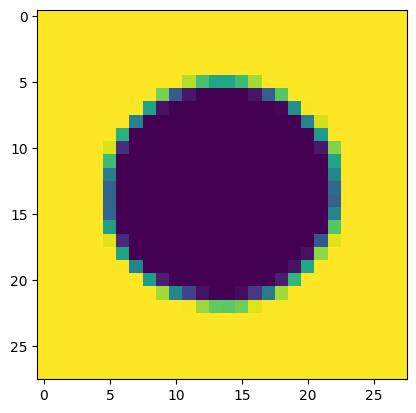

In [111]:
plt.imshow(X[0])

In [112]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)


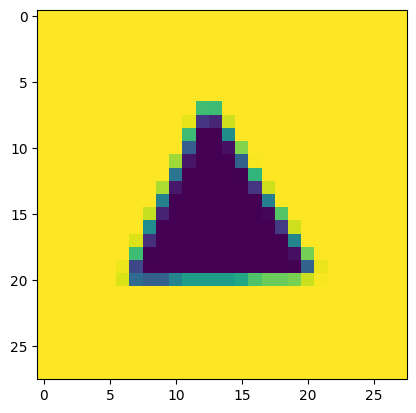

In [113]:
plt.imshow(X_train[0])

In [114]:
X_train[0].shape

(28, 28, 1)

In [115]:
X_train.shape

(11976, 28, 28, 1)

In [116]:
X_train[0].shape

(28, 28, 1)

In [117]:
model = Sequential()
model.add(Flatten(input_shape=(28,28,1)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(4,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [118]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

# Step 1: Define the callback
early_stop = EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

# Step 2: Pass it into model.fit
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop]  # NOT 'callbacks', use the variable name you defined
)


Epoch 1/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7574 - loss: 0.6278 - val_accuracy: 0.9937 - val_loss: 0.0782
Epoch 2/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9821 - loss: 0.0773 - val_accuracy: 0.9950 - val_loss: 0.0325
Epoch 3/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9913 - loss: 0.0372 - val_accuracy: 0.9862 - val_loss: 0.0547
Epoch 4/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9902 - loss: 0.0382 - val_accuracy: 0.9929 - val_loss: 0.0220
Epoch 5/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - loss: 0.0266 - val_accuracy: 0.9954 - val_loss: 0.0202
Epoch 6/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9918 - loss: 0.0301 - val_accuracy: 0.9971 - val_loss: 0.0142
Epoch 7/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9961 - loss: 0.0162 - val_accuracy: 0.9971 - val_loss: 0.0095
Epoch 8/100
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9974 - loss: 0.0104 - val_accu

In [120]:
y_prob=model.predict(X_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [121]:
y_pred=y_prob.argmax(axis=-1)

In [122]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9879759519038076

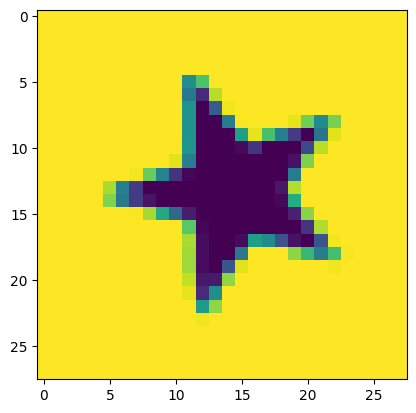

In [123]:
plt.imshow(X_test[666])

In [124]:
class_names[np.argmax(model.predict(X_test[666].reshape(1, 28, 28, 1)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


'star'

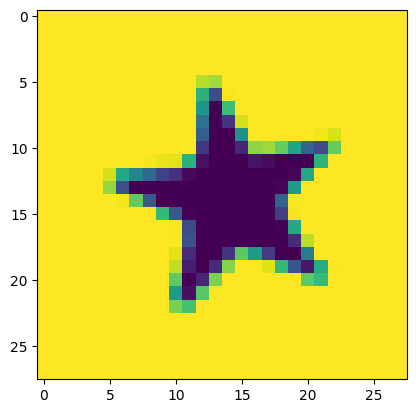

In [125]:
plt.imshow(X_test[3])

In [126]:
class_names[np.argmax(model.predict(X_test[3].reshape(1, 28, 28, 1)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


'star'

In [127]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def predict_shape_from_image(image_path, model, class_names):
    # Step 1: Load image, convert to grayscale
    img = Image.open(image_path).convert('L')

    # Step 2: Resize to 28x28
    img = img.resize((28, 28))

    # Step 3: Convert to numpy array and normalize
    img_array = np.array(img) / 255.0

    # Step 4: Reshape to match model input (batch_size, 28, 28, 1)
    input_image = img_array.reshape(1, 28, 28, 1)

    # Step 5: Make prediction
    prediction = model.predict(input_image)
    predicted_class = class_names[np.argmax(prediction)]

    # Step 6: Display image and prediction
    plt.imshow(img_array, cmap='gray')
    plt.title(f'Predicted: {predicted_class}')
    plt.axis('off')
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


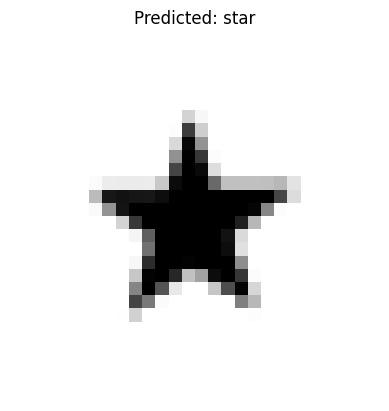

'star'

In [132]:
predict_shape_from_image('/content/shapes/star/100.png', model, class_names)